<a href="https://colab.research.google.com/github/izumis007/LinAlgCourse/blob/main/matrixMults/LA_matrixMults_allCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#     COURSE: Linear algebra: theory and implementation
##    SECTION: Matrix multiplications

#### Instructor: sincxpress.com
##### Course url: https://www.udemy.com/course/linear-algebra-theory-and-implementation/?couponCode=202110

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math


---
# VIDEO: Standard matrix multiplication, parts 1 & 2
---


In [5]:
## rules for multiplication validity

m = 4
n = 3
k = 6

# make some matrices
A = np.random.randn(m,n) #4,3
B = np.random.randn(n,k) #3,6
C = np.random.randn(m,k) #4,6

# test which multiplications are valid.
# Think of your answer first, then test.
np.matmul(A,B) # OK
np.matmul(A.T,A) # No
np.matmul(A.T,C) # OK
np.matmul(B,B.T) # OK
np.matmul(np.matrix.transpose(B),B) #OK
np.matmul(B,C.T) #No
np.matmul(C,B.T) #No
np.matmul(C,B.T) #No
np.matmul(C,B.T)

array([[-1.66808711, -0.28093321, -0.50100578],
       [ 1.03357351,  1.20973561, -2.4938806 ],
       [-1.59554024, -1.07137413, -0.36371411],
       [ 0.41060387,  6.34540346,  2.03071745]])

In [13]:
m = 4
n = 6
A = np.random.randn(m, n)
B = np.random.randn(n, m)
print(A)
print(B)

c1 = np.zeros((m, m))
print(c1)

for i in range(n):
  c1 += np.outer(A[:, i], B[i, :])
  print(c1)

c2 = A@B

print(c1-c2)

[[ 0.28186671  0.15540325 -0.18157233  0.67307451 -0.78388307 -0.81527643]
 [ 0.60713226  1.03725594  0.45347398  0.27634541 -1.13954199 -0.01674311]
 [-0.14018499  1.73690739 -0.60544357  0.52349907 -1.71193516 -0.03094135]
 [-0.77000205  0.72587055  0.13282994  0.01431423  0.4261302  -1.28631828]]
[[ 0.74983803  1.0603019  -1.06906254 -1.59146476]
 [-0.25064718 -1.27311304 -1.26066728  1.36207087]
 [-0.82504535  0.83897842 -1.28598242  2.39966044]
 [-1.86306207 -0.28618442  1.80298547  1.6494167 ]
 [ 0.25087847 -0.98472403  0.63166629  1.69039109]
 [-0.59721321  0.2880031  -0.86017313  2.1305224 ]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[ 0.21135437  0.2988638  -0.30133314 -0.44858093]
 [ 0.45525086  0.64374349 -0.64906235 -0.9662296 ]
 [-0.10511604 -0.14863841  0.14986652  0.22309947]
 [-0.57737682 -0.81643464  0.82318034  1.22543113]]
[[ 0.17240299  0.10101791 -0.49724492 -0.2369107 ]
 [ 0.19526558 -0.67680057 -1.95669699  0.4465865 ]
 [-0.54046697 -2.3599178


---
# VIDEO: Order-of-operations on matrices
---


In [8]:

n = 7
L = np.random.randn(n,n)
I = np.random.randn(n,n)
V = np.random.randn(n,n)
E = np.random.randn(n,n)

# result of "forward" multiplication and then transpose
res1 = np.matrix.transpose( L @ I @ V @ E )

# result of "flipped" multiplication of transposed matrices
res2 = E.T @ V.T @ I.T @ L.T

# test equality by subtracting (ignore possible computer rounding errors)
res1-res2

array([[-1.06581410e-14,  0.00000000e+00, -5.32907052e-15,
         0.00000000e+00,  1.77635684e-15, -3.55271368e-15,
         0.00000000e+00],
       [-4.88498131e-15, -8.88178420e-16, -7.10542736e-15,
         5.32907052e-15,  1.77635684e-15, -2.66453526e-15,
        -5.32907052e-15],
       [ 0.00000000e+00, -7.10542736e-15, -1.42108547e-14,
        -1.42108547e-14, -3.55271368e-15, -5.32907052e-15,
         0.00000000e+00],
       [ 8.88178420e-16,  3.55271368e-15,  3.55271368e-15,
         3.55271368e-15,  0.00000000e+00,  0.00000000e+00,
        -3.55271368e-15],
       [ 6.21724894e-15,  0.00000000e+00, -7.10542736e-15,
        -1.06581410e-14,  3.55271368e-15,  0.00000000e+00,
         7.10542736e-15],
       [ 3.55271368e-15, -4.44089210e-15,  0.00000000e+00,
        -1.42108547e-14, -7.10542736e-15,  4.44089210e-15,
         7.10542736e-15],
       [-7.10542736e-15, -1.77635684e-15,  0.00000000e+00,
         2.13162821e-14,  0.00000000e+00, -2.66453526e-15,
        -1.0658141


---
# VIDEO: Matrix-vector multiplication
---


In [20]:

# number of elements
m = 4

# create matrices
N = np.random.randint(-10,11,(m,m)) # min to max
S = np.round( N.T*N / m**2 ) # scaled symmetric

# and vector
w = np.array([-1, 0, 1, 2])

# with symmetric matrix
print( S@w )     # 1
print( S.T@w )   # 2
print( w@S )     # 3
print( w.T@S.T ) # 4
print( w.T@S )   # 5


# with nonsymmetric matrix
print( N@w )     # 1
print( N.T@w )   # 2
print( w@N )     # 3
print( w.T@N.T ) # 4
print( w.T@N )   # 5


[  5.  10. -11.  -5.]
[  5.  10. -11.  -5.]
[  5.  10. -11.  -5.]
[  5.  10. -11.  -5.]
[  5.  10. -11.  -5.]
[  5 -21 -22  22]
[-3 -5  8  3]
[-3 -5  8  3]
[  5 -21 -22  22]
[-3 -5  8  3]



---
# VIDEO: 2D transformation matrices
---


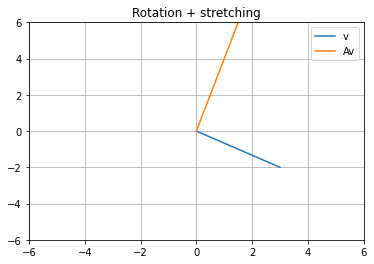

In [26]:
# 2D input vector
v = np.array([ 3, -2 ])

# 2x2 transformation matrix
A = np.array([ [10,10], [20,10] ])

# output vector is Av (convert v to column)
w = A@np.matrix.transpose(v)


# plot them
plt.plot([0,v[0]],[0,v[1]],label='v')
plt.plot([0,w[0]],[0,w[1]],label='Av')

plt.grid()
plt.axis((-6, 6, -6, 6))
plt.legend()
plt.title('Rotation + stretching')
plt.show()

[ 3 -2]
[ 3 -2]


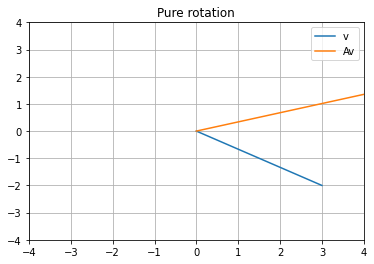

In [41]:
## pure rotation

# 2D input vector
v = np.array([ 3, -2 ])

# 2x2 rotation matrix
th = np.pi/3
A = np.array([ [2*math.cos(th),-math.sin(th)], 
                     [math.sin(th),math.cos(th)] ])

# output vector is Av (convert v to column)
w = A@np.matrix.transpose(v)
print(v)
print(np.matrix.transpose(v))



# plot them
plt.plot([0,v[0]],[0,v[1]],label='v')
plt.plot([0,w[0]],[0,w[1]],label='Av')

plt.grid()
plt.axis((-4, 4, -4, 4))
plt.legend()
plt.title('Pure rotation')
plt.show()

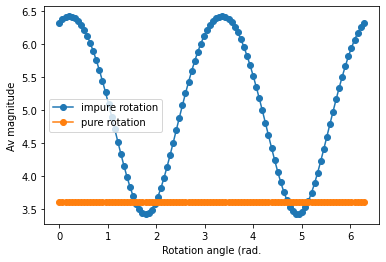

In [52]:
thetas = np.linspace(0, 2*np.pi, 100)
vecmags = np.zeros((len(thetas), 2))
vecmags

for i in range(len(thetas)):
  th = thetas[i]
  A1= np.array([[2*math.cos(th), -math.sin(th)], 
                          [math.sin(th), math.cos(th)]])
  A2 = np.array([[math.cos(th), -math.sin(th)], 
                        [math.sin(th), math.cos(th)]])
  vecmags[i, 0] = np.linalg.norm(A1@v.T)
  vecmags[i, 1] = np.linalg.norm(A2@v.T)

plt.plot(thetas, vecmags, "o-")
plt.xlabel("Rotation angle (rad.")
plt.ylabel("Av magnitude")
plt.legend(["impure rotation", "pure rotation"])
plt.show()


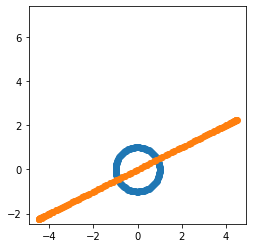

In [71]:
x = np.linspace(-np.pi, np.pi, 100)
xy =np.vstack((np.cos(x), np.sin(x))).T

# plot the circle
plt.plot(xy[ : , 0], xy[ : , 1], "o")

# create a matrix
T = np.array([ [4, 2], [2, 1] ])

# multiply matrix by coords
newxy = xy@T

# plot the new coords
plt.plot(newxy[ : , 0], newxy[ : , 1], "o")
plt.axis("square")
plt.show()


---
# VIDEO: Additive and multiplicative matrix identities
---


In [74]:
# size of matrices
n = 4

# create the matrices
A = np.round( 10*np.random.randn(n,n) )
I = np.eye(n)
Z = np.zeros((n,n))

# test both identities
print(np.array_equal( A@I , A   ))
print(np.array_equal( A   , A@I ))
print(np.array_equal( A   , A+I ))

print(np.array_equal( A   , A+Z ))
print(np.array_equal( A+Z , A@I ))


True
True
False
True
True



---
# VIDEO: Additive and multiplicative symmetric matrices
---


In [75]:
## the additive method

# specify sizes
m = 5
n = 5

# create matrices
A = np.random.randn(m,n)
S = ( A + A.T )/2

# A symmetric matrix minus its transpose should be all zeros
print( S-S.T )


[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [76]:
## the multiplicative method

# specify sizes
m = 5
n = 3

# create matrices
A   = np.random.randn(m,n)
AtA = A.T@A
AAt = A@A.T

# first, show that they are square
print( AtA.shape )
print( AAt.shape )


# next, show that they are symmetric
print( AtA - AtA.T )
print( AAt - AAt.T )



(3, 3)
(5, 5)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]



---
# VIDEO: Element-wise (Hadamard) multiplication
---


In [78]:
# any matrix sizes
m = 13
n =  2

# ...but the two matrices must be the same size
A = np.random.randn(m,n)
B = np.random.randn(m,n)

# note the different syntax compared to @ for matrix multiplication
C1 = np.multiply( A,B )
C2 = A*B

print(C1), print(' ')
print(C2), print(' ')

print(C1-C2)


[[-1.34419526e-03  3.05779251e-01]
 [-5.20510374e-02 -5.28571218e-01]
 [-6.70748634e-01 -1.77296947e+00]
 [-5.60473800e-02 -1.04254478e+00]
 [-3.41232853e-01 -4.65272262e-01]
 [ 1.23366770e-01  7.17920566e-01]
 [ 6.36828467e-01  7.27822235e-02]
 [-3.89884304e-01 -9.72682648e-01]
 [-8.12602815e-02 -2.65989714e-01]
 [-9.71182854e-01  1.88544086e-01]
 [ 6.81018068e-02 -6.09062011e-01]
 [-5.56986218e-01 -4.55821790e-01]
 [ 6.14324122e-01  6.75244978e-02]]
 
[[-1.34419526e-03  3.05779251e-01]
 [-5.20510374e-02 -5.28571218e-01]
 [-6.70748634e-01 -1.77296947e+00]
 [-5.60473800e-02 -1.04254478e+00]
 [-3.41232853e-01 -4.65272262e-01]
 [ 1.23366770e-01  7.17920566e-01]
 [ 6.36828467e-01  7.27822235e-02]
 [-3.89884304e-01 -9.72682648e-01]
 [-8.12602815e-02 -2.65989714e-01]
 [-9.71182854e-01  1.88544086e-01]
 [ 6.81018068e-02 -6.09062011e-01]
 [-5.56986218e-01 -4.55821790e-01]
 [ 6.14324122e-01  6.75244978e-02]]
 
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0

In [83]:
m = 5
n = 4
A = np.random.randn(m,n)
B = np.random.randn(m,n)
A = A.T@A
B = B.T@B
print(A+B) # symmetric
print(A@B) # not symmetric
print(B@A) # not symmetric
print(A*B) # symmetric

[[28.50600124  6.70328206  2.42174329 -9.708496  ]
 [ 6.70328206 14.0556843  -1.68632533  3.16063587]
 [ 2.42174329 -1.68632533 12.133236   -0.04624444]
 [-9.708496    3.16063587 -0.04624444 11.9292581 ]]
[[102.52740629  22.42749877  10.74547255 -45.73223497]
 [ 36.72254223  31.96447613  11.01690288  -3.07255651]
 [-64.45271556 -16.44310147   8.86942306  34.74510922]
 [-53.24581142   3.80641216   2.24482759  37.25239939]]
[[102.52740629  36.72254223 -64.45271556 -53.24581142]
 [ 22.42749877  31.96447613 -16.44310147   3.80641216]
 [ 10.74547255  11.01690288   8.86942306   2.24482759]
 [-45.73223497  -3.07255651  34.74510922  37.25239939]]
[[101.00212614   9.94576083 -19.64431714  11.22383646]
 [  9.94576083  38.79504093  -7.72751084  -9.0488148 ]
 [-19.64431714  -7.72751084  36.46791473  -0.22666369]
 [ 11.22383646  -9.0488148   -0.22666369  35.30404142]]



---
# VIDEO: Multiplication of two symmetric matrices
---


In [85]:
# using the sympy library
from sympy import *

a,b,c,d,e,f,g,h,k,l,m,n,o,p,q,r,s,t,u = symbols('a b c d e f g h k l m n o p q r s t u', real=True)

# symmetric and constant-diagonal matrices
A = Matrix([ [a,b,c,d],
                  [b,a,e,f],
                  [c,e,a,h],
                  [d,f,h,a]   ])

B = Matrix([ [l,m,n,o],
                  [m,l,q,r],
                  [n,q,l,t],
                  [o,r,t,l]   ])


# confirmation that A and B are symmetric
print( A - A.transpose() )
print( B - B.transpose() )

# ... and constant diagonal
for i in range(0,np.size(A,0)):
    print( A[i,i] )
for i in range(0,np.size(B,0)):
    print( B[i,i] )


Matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
Matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
a
a
a
a
l
l
l
l


In [92]:
# nice printing in sympy
init_printing()

# but AB neq (AB)'
print(A@B - (A@B).T)

# maybe for a submatrix?
n = 2
A1 = A[ 0:n,0:n ]
B1 = B[ 0:n,0:n ]

print(A1@B1 - (A1@B1).T)

Matrix([[0, c*q + d*r - e*n - f*o, b*q + d*t - e*m - h*o, b*r + c*t - f*m - h*n], [-c*q - d*r + e*n + f*o, 0, b*n - c*m + f*t - h*r, b*o - d*m + e*t - h*q], [-b*q - d*t + e*m + h*o, -b*n + c*m - f*t + h*r, 0, c*o - d*n + e*r - f*q], [-b*r - c*t + f*m + h*n, -b*o + d*m - e*t + h*q, -c*o + d*n - e*r + f*q, 0]])
Matrix([[0, 0], [0, 0]])


In [96]:
m = 4
A = np.random.randn(m, m)
B = np.diag(np.random.randn(m))
print(A@A)
print(A*A)
print(B@B)
print(B*B)

[[-1.80736128e-01 -2.38271312e-01  1.63665516e+00  2.41116862e-02]
 [ 2.03816447e-01  8.31470574e-01  1.60114971e-01  4.31781643e-01]
 [-1.64031335e-01 -9.25421596e-02  5.74828116e-01  1.67292378e-01]
 [-3.22880619e-01 -2.29373471e+00 -1.89892152e+00  1.81592649e-03]]
[[4.37624554e-03 1.33894369e+00 3.95505699e-01 3.48634269e-02]
 [5.24215314e-06 1.70761852e-01 1.77824073e+00 6.29663002e-03]
 [3.12140796e-02 3.37524249e-01 6.61135629e-02 6.95260334e-02]
 [1.68530270e-01 2.16162388e+00 3.45113555e-01 3.50035157e-01]]
[[0.17101373 0.         0.         0.        ]
 [0.         1.21875688 0.         0.        ]
 [0.         0.         0.1871181  0.        ]
 [0.         0.         0.         0.32484045]]
[[0.17101373 0.         0.         0.        ]
 [0.         1.21875688 0.         0.        ]
 [0.         0.         0.1871181  0.        ]
 [0.         0.         0.         0.32484045]]


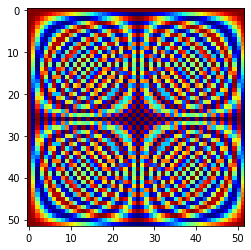

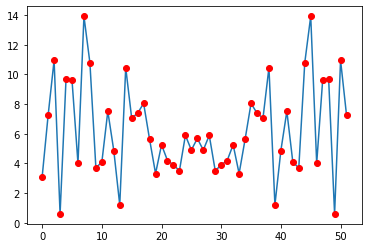

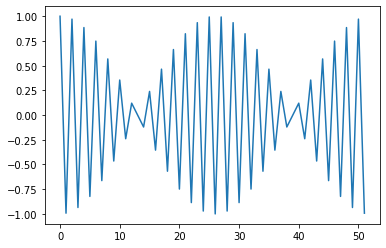

In [99]:
n = 52
omega = np.e**(-2*np.pi*1j/n)

F = np.zeros((n, n), dtype=complex)

for j in range(n):
  for k in range(n):
    m = j * k
    F[j, k] = omega**m

plt.imshow(F.real, cmap='jet')
plt.show()

x = np.random.randn(n)
X1 = F@x
X2 = np.fft.fft(x)

plt.figure()
plt.plot(abs(X1))
plt.plot(abs(X2), marker='o', color='r', linestyle='None')
plt.show()
plt.plot(F.real[:, 25])
plt.show()


---
# VIDEO: Frobenius dot-product
---


In [104]:
# any matrix sizes
m = 9
n = 4

# but the two matrices must be the same size
A = np.random.randn(m,n)
B = np.random.randn(m,n)

# first vectorize, then vector-dot-product
Av = np.reshape( A,m*n, order='F' ) # order='F' reshapes by columns instead of by rows
Bv = np.reshape( B,m*n, order='F' )

print(Av)
print(Bv)

frob_dp = np.dot( Av,Bv )

# trace method
frob_dp2 = np.trace( A.T@B )
print(frob_dp2)
print(frob_dp)

# matrix norm
Anorm  = np.linalg.norm(A,'fro')
Anorm2 = np.sqrt( np.trace( A.T@A ) )
print(Anorm)
print(Anorm2)

[ 0.44393529  0.24675059 -1.03045903  0.03220097 -0.41874087 -3.02377781
 -0.63951654 -2.18555686  0.24711377  0.15536019 -0.52227101  0.03522005
 -0.80237408 -1.07142845  0.7710796   0.4436772  -0.27276409  0.00625283
  2.28327111 -0.45810965  0.64488033  0.37130281 -1.31981582  2.1898638
 -0.71751941 -1.5112313  -1.4120164  -0.07787446 -0.67881234  0.70030502
  0.17733045  1.42504741 -0.60456317  0.06743133  1.6454608  -0.94906752]
[ 0.74332143 -0.84302541 -0.91185669  1.04981428 -1.79368551 -0.54515647
  0.34584659  1.92443953  0.47278846 -1.58262767  0.51272913  0.5117294
  0.2003949   0.76740347  1.6786813   0.80430349  0.73740271 -0.97413808
 -1.80389081  0.87161568  0.95768823  1.19623491  0.43773029  1.420603
 -0.18257196 -1.09866374  0.55570064  0.42210393 -0.80519114 -1.08930475
 -0.71231872  1.63328525 -1.29473132 -0.53886032 -1.17022015 -0.7398527 ]
0.7086368701106383
0.7086368701106389
6.568597730958636
6.568597730958636


# VIDEO: Matrix norms

In [105]:
# Create a matrix
A = np.array([ [1,2,3], [4,5,6], [7,7,9] ])

# optional orthogonal matrix to show that 2-norm is 1
Q,R = np.linalg.qr(np.random.randn(5,5))
# A = Q

# Frobenius norm
normFrob = np.linalg.norm(A,'fro')

# induced 2-norm
normInd2 = np.linalg.norm(A,2)
# note: computed as below
lamb = np.sqrt( np.max(np.linalg.eig(A.T@A)[0]) )

# schatten p-norm
p = 2
s = np.linalg.svd(A)[1] # get singular values
normSchat = np.sum(s**p)**(1/p)


# % show all norms for comparison
print(normFrob,normSchat,normInd2)


16.431676725154983 16.431676725154986 16.392007827749776


In [108]:
m = 5

A = np.random.randn(m, m)
A = A@A.T
print(A)

v = np.random.randn(m)
w = np.random.rand(m)

np.dot(A@v, w) - np.dot(v, A@w)


[[ 8.2871382   2.47299465 -4.05200792 -3.62278483 -1.00353239]
 [ 2.47299465  9.95628037 -1.73735161  0.53737903  3.81499203]
 [-4.05200792 -1.73735161  3.12338939  0.99221948 -0.27532194]
 [-3.62278483  0.53737903  0.99221948  7.03142295  0.07084427]
 [-1.00353239  3.81499203 -0.27532194  0.07084427  3.88738254]]


In [109]:
# part1: implement MAI

def MAI(A):
  Aanti = (A - A.T)/2
  mai = np.linalg.norm(Aanti) / np.linalg.norm(A)
  return mai

In [113]:
# part2: compute MAI for symmetric, skew-symmetric, and rondom matrix
A = np.random.randn(5, 5)
print(A)
print(A.T)
A = (A-A.T)/2
print(A)
print(MAI(A))


[[-1.21285128 -0.70125483 -0.29632871 -0.32535686 -0.33174291]
 [-1.08353041  2.09300309  0.15305936 -0.03910298  0.74289694]
 [ 0.12993001  0.13675334  0.33217286 -0.92342841 -0.99220924]
 [-0.64599412 -1.03002261 -0.59342044 -0.24205252 -0.73833654]
 [-0.1338592   2.00687653 -0.21207035 -0.18493704  0.65531999]]
[[-1.21285128 -1.08353041  0.12993001 -0.64599412 -0.1338592 ]
 [-0.70125483  2.09300309  0.13675334 -1.03002261  2.00687653]
 [-0.29632871  0.15305936  0.33217286 -0.59342044 -0.21207035]
 [-0.32535686 -0.03910298 -0.92342841 -0.24205252 -0.18493704]
 [-0.33174291  0.74289694 -0.99220924 -0.73833654  0.65531999]]
[[ 0.          0.19113779 -0.21312936  0.16031863 -0.09894185]
 [-0.19113779  0.          0.00815301  0.49545982 -0.6319898 ]
 [ 0.21312936 -0.00815301  0.         -0.16500399 -0.39006944]
 [-0.16031863 -0.49545982  0.16500399  0.         -0.27669975]
 [ 0.09894185  0.6319898   0.39006944  0.27669975  0.        ]]
1.0


In [116]:
# part3: formula for mixing skew/symmetric matrices

p = 0
A = np.random.randn(5, 5)
B = (1-p)*(A+A.T)/2 + p*(A-A.T)/2
B


array([[-0.96604074,  0.47366918, -0.2070699 ,  0.90467878, -0.92617149],
       [ 0.47366918, -1.42332208,  0.13900545, -0.92471964, -0.23000994],
       [-0.2070699 ,  0.13900545, -1.94924731, -0.78794491, -0.15315616],
       [ 0.90467878, -0.92471964, -0.78794491, -0.79399417, -0.10472912],
       [-0.92617149, -0.23000994, -0.15315616, -0.10472912,  0.76542385]])

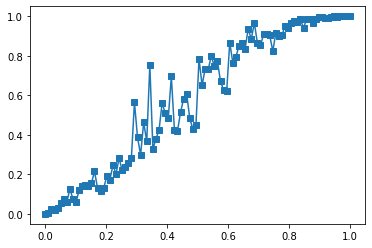

In [119]:
# part4: test on random matrices

ps = np.linspace(0, 1, 100)
mai = np.zeros(len(ps))

for i in range(len(ps)):
  # create a matrix 
  p = ps[i]
  A = np.random.randn(5, 5)
  B = (1-p)*(A+A.T)/2 + p*(A-A.T)/2
  # compute and store the MAI
  mai[i] = MAI(B)

plt.plot(ps, mai, "s-")
plt.show()